#### 项目介绍:
黑色星期五是美国感恩节后一天，圣诞节前的一次大采购活动，当天一般美国商场会推出大量的打折优惠、促销活动， 由于美国的商场一般以红笔记录赤字，以黑笔记录盈利，而感恩节后的这个星期五人们疯狂的抢购使得商场利润大增，因此被商家们称作黑色星期五。 商家期望通过以这一天开始的圣诞大采购为这一年获得最多的盈利。

#### 分析目的:
本次的分析数据来自于Kaggle提供的某电商黑色星期五的销售记录， 将围绕产品和用户两大方面展开叙述，为电商平台制定策略提供分析及建议。

#### 本文分析的主要框架
1.整体消费的情况

2.用户画像分析(探究最优价值的用户类型:性别、年龄、职业、婚姻)

3.城市业绩分析(城市分布 、居住年限分布)

3.产品分析(探究最优价值的产品) 细化分析：产品销售额Top 5产品、产品销售额Top5 产品类别

4.最大贡献用户价值分析: 客单价、价值Top1000用户清单、价值Top1000用户情况

5.结论以及建议

### 0.数据集观察

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来显示正常负号
import seaborn as sns
df=pd.read_csv("BlackFriday.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


#### 原始数据中共有12个字段，每个字段共537577行，字段解释如下：
User_ID： 用户ID

Product_ID: 产品ID

Gender: 性别

Age: 年龄

Occupation: 职业

City_Category: 城市（A,B,C）

Stay_In_Current_City_Years： 居住时长

Marital_Status： 婚姻状况

Product_Category_1 产品类别1,是一级分类

Product_Category_2 产品类别2,是二级分类

Product_Category_3 产品类别3,是三级分类

Purchase： 金额（美元）

In [3]:
(df.shape[0]-df.count())/df.shape[0]

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.310627
Product_Category_3            0.694410
Purchase                      0.000000
dtype: float64

其中产品类别2和3是有欠缺的

Product_Category_2将近欠缺了31%的数据

Product_Category_3将近欠缺了69%的数据

In [4]:
print(df["Product_Category_2"].unique())
print("-"*30)
print(df["Product_Category_3"].unique())

[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
------------------------------
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


Product_Category_2、Product_Category_3存在NaN值

## 1.我们先来看下整体的消费情况

In [5]:
df["Purchase"].sum()  #总消费金额50亿美元

5017668378

In [6]:
df["Product_ID"].count() #消费产品数量53.7万（一个product_ID视为一件）

537577

In [7]:
df["Purchase"].sum()/df["Product_ID"].count()  #平均每个产品的价格是9333美元

9333.859852635065

In [8]:
df["Purchase"].sum()/df["User_ID"].drop_duplicates(keep="first").count() 
#平均客单价是85万美元

851751.5494822611

## 2.我们一起从用户的角度上来考虑下问题

#### （1）性别方面

In [9]:
df_gender_purchase=df.groupby("Gender").agg({"Purchase":"sum"}).reset_index().rename(columns={"Purchase":"Purchase_amout"})
df_gender_purchase["gender_purchase_prop"]=df_gender_purchase.apply(lambda x:x[1]/df["Purchase"].sum(),axis=1) #金额占比
def Gender_user_count(x):
    if  x[0] == "F":
        return(df.loc[df["Gender"]=="F"].drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count())
    if  x[0] == "M":
        return(df.loc[df["Gender"]=="M"].drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count())
df_gender_purchase["gender_user_count"]=df_gender_purchase.apply(lambda x:Gender_user_count(x),axis=1)
df_gender_purchase["gender_customer_price"]=df_gender_purchase.apply(lambda x:x[1]/x[3],axis=1)
df_gender_purchase["gender_user_prop"]=df_gender_purchase.apply(lambda x:x[3]/df.drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count(),axis=1)
df_gender_purchase

,Gender,Purchase_amout,gender_purchase_prop,gender_user_count,gender_customer_price,gender_user_prop
0,F,1164624021,0.232105,1666,699054.034214,0.282804
1,M,3853044357,0.767895,4225,911963.161420,0.717196


男性用户及消费金额远超女性，男性用户占整体的71.7%，是女性的2.5倍，男性消费金额占整体76.7%，是女性的3.3倍。

显然 有男性用户更多参与本次活动，且客单价高于女性，所以产品应倾向男性及针对男性的产品价格较高进行推销。

#### (2)年龄方面

In [10]:
df_age_purchase=df.groupby("Age").agg({"Purchase":"sum"}).reset_index().rename(columns={"Purchase":"Purchase_amout"})
df_age_purchase["age_purchase_prop"]=df_age_purchase.apply(lambda x:x[1]/df["Purchase"].sum(),axis=1)

def Age_user_count(x):
    for i in df["Age"].drop_duplicates():
        if x[0] == i:
            return(df.loc[df["Age"]==i].drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count())
df_age_purchase["Age_user_count"]=df_age_purchase.apply(lambda x : Age_user_count(x),axis=1)
df_age_purchase["Age_Purchase_count"]=df_age_purchase.apply(lambda x: x[1]/x[3],axis=1)
df_age_purchase["Age_user_prop"]=df_age_purchase.apply(lambda x : x[3]/df.drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count(),axis=1)
df_age_purchase

,Age,Purchase_amout,age_purchase_prop,Age_user_count,Age_Purchase_count,Age_user_prop
0,0-17,132659006,0.026438,218,608527.550459,0.037006
1,18-25,901669280,0.179699,1069,843469.859682,0.181463
2,26-35,1999749106,0.398542,2053,974061.912323,0.348498
3,36-45,1010649565,0.201418,1167,866023.620394,0.198099
4,46-50,413418223,0.082392,531,778565.391714,0.090137
5,51-55,361908356,0.072127,481,752408.224532,0.081650
6,55+,197614842,0.039384,372,531222.693548,0.063147


购买消费金额的年龄段在18-45岁的居多，占整体78%，其中26-35岁人群的消费金额占40%

用户个数在18-45岁的占73%，其中26-35岁的个数占整体35%；

18-45岁的用户群体客单价在84万以上，消费极大。

无论是消费金额还是消费次数，18-45岁群体占主力，重点推销产品的对象是该用户群体。

#### （3）婚姻方面

In [11]:
df_Marital_purchase=df.groupby("Marital_Status").agg({"Purchase":"sum"}).reset_index().rename(columns={"Purchase":"Purchase_amount"})
df_Marital_purchase["Marital_Purchase_Prop"]=df_Marital_purchase.apply(lambda x:x[1]/df["Purchase"].sum(),axis =1)
def Marital_user_count(x):
    if x[0] == 0:
        return (df.loc[df["Marital_Status"]==0].drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count())
    if x[0] == 1:
        return (df.loc[df["Marital_Status"]==1].drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count())
df_Marital_purchase["Marital_user_count"]=df_Marital_purchase.apply(lambda x :Marital_user_count(x),axis=1)
df_Marital_purchase["Marital_Purchase_count"]=df_Marital_purchase.apply(lambda x:x[1]/x[3],axis=1)
df_Marital_purchase["Marital_user_prop"]=df_Marital_purchase.apply(lambda x:x[3]/df.drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count(),axis=1)
df_Marital_purchase

,Marital_Status,Purchase_amount,Marital_Purchase_Prop,Marital_user_count,Marital_Purchase_count,Marital_user_prop
0,0,2966289500,0.591169,3417,868097.600234,0.580037
1,1,2051378878,0.408831,2474,829174.970897,0.419963


不结婚的人群在消费金额及消费次数上是已婚人群的1.5倍左右；

#### (4)接下来我们合并性别和婚姻状态这两个字段分析不同年龄段的销售额情况

In [12]:
df["Gender_MaritalStatus"]=df[["Gender","Marital_Status"]].apply(lambda x:str(x[0])+"_"+str(x[1]),axis=1)

In [13]:
df_Gender_MaritalStatus_purchase = df.groupby(["Gender_MaritalStatus","Age"]).agg({"Purchase":"sum"}).reset_index().rename(columns={"Purchase":"Purchase_amount"})
df_Gender_MaritalStatus_purchase


,Gender_MaritalStatus,Age,Purchase_amount
0,F_0,0-17,41826615
1,F_0,18-25,153305178
2,F_0,26-35,254464648
3,F_0,36-45,148392364
4,F_0,46-50,27113309
5,F_0,51-55,32195400
6,F_0,55+,16518203
7,F_1,18-25,48904272
8,F_1,26-35,179393032
9,F_1,36-45,90618116


In [14]:
def Gender_MaritalStatus_user_count(x):
    for i in df["Gender_MaritalStatus"].drop_duplicates():
        for j in df["Age"].drop_duplicates():
            if x[0]==i and x[1]==j:
                return (df.loc[(df["Gender_MaritalStatus"]==i) & (df["Age"]==j)].drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count())

In [15]:
df_Gender_MaritalStatus_purchase["Gender_MaritalStatus_user_count"]=df_Gender_MaritalStatus_purchase.apply(lambda x:Gender_MaritalStatus_user_count(x),axis=1) #消费人次
df_Gender_MaritalStatus_purchase["Gender_MaritalStatus_user_price"]=df_Gender_MaritalStatus_purchase.apply(lambda x:x[2]/x[3],axis=1) #客单价
df_Gender_MaritalStatus_purchase["Gender_MaritalStatus_user_prop"]=df_Gender_MaritalStatus_purchase.apply(lambda x:x[3]/df.drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count(),axis=1) #消费人次占比
df_Gender_MaritalStatus_purchase["Gender_MaritalStatus_purchase_prop"]=df_Gender_MaritalStatus_purchase.apply(lambda x:x[2]/df["Purchase"].sum(),axis=1) #消费金额占比

In [37]:
df_Gender_MaritalStatus_purchase

,Gender_MaritalStatus,Age,Purchase_amount,Gender_MaritalStatus_user_count,Gender_MaritalStatus_user_price,Gender_MaritalStatus_user_prop,Gender_MaritalStatus_purchase_prop
0,F_0,0-17,41826615,78,5.362387e+05,0.013241,0.008336
1,F_0,18-25,153305178,217,7.064755e+05,0.036836,0.030553
2,F_0,26-35,254464648,320,7.952020e+05,0.054320,0.050714
3,F_0,36-45,148392364,202,7.346157e+05,0.034290,0.029574
4,F_0,46-50,27113309,49,5.533328e+05,0.008318,0.005404
5,F_0,51-55,32195400,49,6.570490e+05,0.008318,0.006416
6,F_0,55+,16518203,32,5.161938e+05,0.005432,0.003292
7,F_1,18-25,48904272,70,6.986325e+05,0.011883,0.009746
8,F_1,26-35,179393032,225,7.973024e+05,0.038194,0.035752
9,F_1,36-45,90618116,131,6.917413e+05,0.022237,0.018060


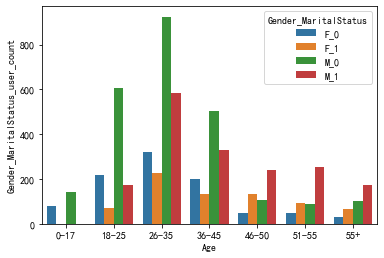

In [16]:
sns.barplot(x="Age",y="Gender_MaritalStatus_user_count",hue="Gender_MaritalStatus",data=df_Gender_MaritalStatus_purchase)

26-35岁年龄段，未婚男性的消费人次最多，

18-45岁年龄段，均是未婚男性消费人次高于其他类人群

说明产品重点推售对象应该为18-45岁，未婚男性

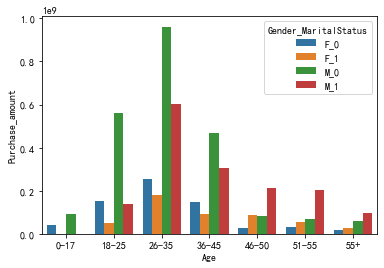

In [17]:
sns.barplot(x="Age",y="Purchase_amount",hue="Gender_MaritalStatus",data=df_Gender_MaritalStatus_purchase)

消费金额

在18-45岁期间，男性未婚消费金额远超其他类人群，其中26-35岁的男性未婚消费金额最高

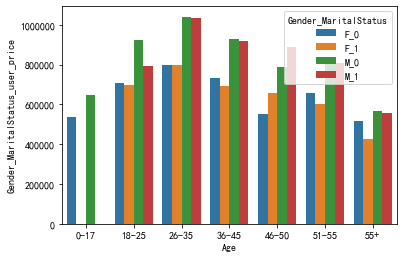

In [18]:
sns.barplot(x="Age",y="Gender_MaritalStatus_user_price",hue="Gender_MaritalStatus",data=df_Gender_MaritalStatus_purchase)

客单价

从客单价角度观察，男性客单价均高于女性

在26-45岁，男性婚否对消费金额产生的差异不大

18-25岁，男性未婚的客单价高于男性已婚


#### (5)我们再来考虑不同职位的下的人购买情况

In [23]:
df_Occupation_purchase=df.groupby("Occupation").agg({"Purchase":"sum"}).reset_index().rename(columns={"Purchase":"Purchase_amount"})
df_Occupation_purchase["Occupation_purchase_prop"]=df_Occupation_purchase.apply(lambda x:x[1]/df["Purchase"].sum(),axis=1)
def Occupation_user_count(x):
    for i in df["Occupation"].drop_duplicates():
        if x[0]==i:
            return (df.loc[df["Occupation"]==i].drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count())
df_Occupation_purchase["Occupation_user_count"]=df_Occupation_purchase.apply(lambda x:Occupation_user_count(x),axis=1)
df_Occupation_purchase["Occupation_customer_price"]=df_Occupation_purchase.apply(lambda x:x[1]/x[3],axis=1)
df_Occupation_purchase["Occupation_user_prop"]=df_Occupation_purchase.apply(lambda x:x[3]/df.drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count(),axis=1)
df_Occupation_purchase.sort_values("Occupation_user_count",ascending=False)

,Occupation,Purchase_amount,Occupation_purchase_prop,Occupation_user_count,Occupation_customer_price,Occupation_user_prop
4,4,657530393,0.131043,740,8.885546e+05,0.125615
0,0,625814811,0.124722,688,9.096146e+05,0.116788
7,7,549282744,0.109470,669,8.210504e+05,0.113563
1,1,414552829,0.082619,517,8.018430e+05,0.087761
17,17,387240355,0.077175,491,7.886769e+05,0.083347
12,12,300672105,0.059923,376,7.996599e+05,0.063826
14,14,255594745,0.050939,294,8.693699e+05,0.049907
20,20,292276985,0.058250,273,1.070612e+06,0.046342
2,2,233275393,0.046491,256,9.112320e+05,0.043456
16,16,234442330,0.046723,235,9.976269e+05,0.039891


4、0、7、1职业的人群合计占总人数的40%，是重点关注对象

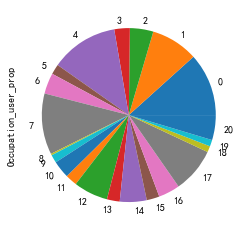

In [24]:
df_Occupation_purchase["Occupation_user_prop"].plot.pie()

### 3.我们一起从城市贡献的角度上来考虑

In [25]:
df_City_Category_purchase=df.groupby("City_Category").agg({"Purchase":"sum"}).reset_index().rename(columns={"Purchase":"Purchase_amount"})

In [27]:
df_City_Category_purchase=df.groupby("City_Category").agg({"Purchase":"sum"}).reset_index().rename(columns={"Purchase":"Purchase_amount"})
df_City_Category_purchase["Purchase_prop"]=df_City_Category_purchase.apply(lambda x:x[1]/df["Purchase"].sum(),axis=1)

def City_Category_user_count(x):
    for i in df["City_Category"].drop_duplicates():
        if x[0] ==  i :
            return (df.loc[df["City_Category"]==i].drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count())

df_City_Category_purchase["City_Category_user_count"]=df_City_Category_purchase.apply(lambda x:City_Category_user_count(x),axis=1)
df_City_Category_purchase["City_Category_customer_price"]=df_City_Category_purchase.apply(lambda x:x[1]/x[3],axis=1)
df_City_Category_purchase["City_Category_user_prop"]=df_City_Category_purchase.apply(lambda x:x[3]/df.drop_duplicates(subset=["User_ID"],keep="first")["User_ID"].count(),axis=1)
df_City_Category_purchase

,City_Category,Purchase_amount,Purchase_prop,City_Category_user_count,City_Category_customer_price,City_Category_user_prop
0,A,1295668797,0.258221,1045,1.239874e+06,0.177389
1,B,2083431612,0.415219,1707,1.220522e+06,0.289764
2,C,1638567969,0.326560,3139,5.220032e+05,0.532847


B城市的消费人次占29%，但消费金额占41.5%，而C城市的消费人次占53%，但消费金额占32.6%。

A和B城市的客单价是C城市的两倍以上。

AB城市的产品价格可以进行提高，C城市的产品价格可进行调低，在C城市以提高销售量为主的推售策略，AB城市以提高销售额为主的推售策略。

### 4.品相方面来考虑

#### (1)销量Top10的产品

In [37]:
df_count10 = df.groupby("Product_ID").agg({"User_ID":"count","Purchase":"sum"}).rename(columns={"Purchase":"Purchase_amount","User_ID":"User_count"}).reset_index()
df_Purchase_amount10=df_count10.sort_values("Purchase_amount",ascending=False)[["Product_ID","Purchase_amount"]].head(10)
df_Purchase_amount10

,Product_ID,Purchase_amount
249,P00025442,27532426
1014,P00110742,26382569
2441,P00255842,24652442
1743,P00184942,24060871
581,P00059442,23948299
1028,P00112142,23882624
1016,P00110942,23232538
2261,P00237542,23096487
565,P00057642,22493690
104,P00010742,21865042


#### (2)销售金额Top10 产品

In [38]:
df_User_count10=df_count10.sort_values("User_count",ascending=False)[["Product_ID","User_count"]].head(10)
df_User_count10

,Product_ID,User_count
2534,P00265242,1858
1014,P00110742,1591
249,P00025442,1586
1028,P00112142,1539
565,P00057642,1430
1743,P00184942,1424
458,P00046742,1417
568,P00058042,1396
1353,P00145042,1384
581,P00059442,1384


#### (3)有哪些产品在销量和销量金额都是在Top10中的

In [39]:
pd.merge(df_Purchase_amount10,df_User_count10,how="inner")

,Product_ID,Purchase_amount,User_count
0,P00025442,27532426,1586
1,P00110742,26382569,1591
2,P00184942,24060871,1424
3,P00059442,23948299,1384
4,P00112142,23882624,1539
5,P00057642,22493690,1430


In [45]:
df_amount=df.groupby("Product_Category_1").agg({"User_ID":"count","Purchase":"sum"}).rename(columns={"Purchase":"Purchase_amount","User_ID":"User_count"}).reset_index().sort_values(by=["Purchase_amount"],ascending=False)
df_amount["Category_Prop"]=df_amount.apply(lambda x:x[2]/df["Purchase"].sum(),axis=1)
df_amount

,Product_Category_1,User_count,Purchase_amount,Category_Prop
0,1,138353,1882666325,0.375207
4,5,148592,926917497,0.184731
7,8,112132,840693394,0.167547
5,6,20164,319355286,0.063646
1,2,23499,264497242,0.052713
2,3,19849,200412211,0.039941
15,16,9697,143168035,0.028533
10,11,23960,112203088,0.022362
9,10,5032,99029631,0.019736
14,15,6203,91658147,0.018267


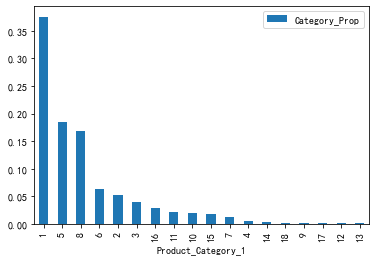

In [46]:
df_amount.plot.bar(x="Product_Category_1",y="Category_Prop")

产品类型1中的1号产品消费金额占整个类型的37.5%,

5、8号产品紧跟其后,在17%左右，其余的产品竞争力不强

## 5、总结
### 1、用户角度

#### 结论汇总：

- 年龄26-35岁，职业编号为“4、0、7”，“1”的未婚男性消费人群属于高消费人群，该平台的超级忠实用户

#### 后续改进：

- 对高价值用户重点关注，进行更精细化的营销，后续为这些用户提供更多高价值的消费品；
- 针对其他用户，主要引导用户点击购买，多推荐一些热销产品；
### 2、商品角度

#### 结论汇总：

- 一级产品分类的5/1/8销量、销售额都是排在前3的，这三类产品贡献了72%的销售量
- 销量排名最低的三个商品种类是17、 12 、 13，合计占比3%不到
- 即在在Top10销售额中的产品和在Top10销售量的产品，可利用爆款商品陈列位置为其他产品引流。

#### 后续改进：

- 可以在最受用户欢迎的商品top10的商品和其他一些相关的商品做一些捆绑销售，带动其他商品的销量；在一级商品分类为5、1、8的商品页面推荐一些其他的商品，引导用户去点击购买；
- 具体再分析下销量排名最低的三个商品种类是什么原因造成的，如果商品种类16、11、12是一些已经淘汰过时的商品或者被一些该商品的替代品占领了市场，可以考虑是否要下架，减少相关渠道的广告等；
### 3、城市角度：

#### 结论汇总：

- B城市的消费人次占29%，但消费金额占41.5%，而C城市的消费人次占53%，但消费金额占32.6%。
- A和B城市的客单价是C城市的两倍以上。

#### 后续改进：

- 畅销第一级别类目依次是5、8、1，仓库管理需按畅销商品名单、分类，安排库存，对于消费旺盛B城市提前备货，节省调度；同时监控库存，防止断货。